# Employee Salary Analysis

## Problem Statement:

A company HR team wants to understand their employee salary distribution, average salary by department, and detect pay gaps.

### Questions to Solve:

    - Load the dataset and clean missing values.

    - What is the average salary of employees across all departments?

    - Which department has the highest average salary?

    - Find the top 5 highest-paid employees.

    - What is the average salary by gender in each department?

In [3]:
import pandas as pd

### 1. Load the dataset and clean missing values.


In [6]:
employee_data = pd.read_csv('data/HRDataset_v14.csv')

pd.set_option('display.max_columns', None)

employee_data

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,07/10/83,M,Single,US Citizen,No,White,7/5/2011,NaN,N/A-StillEmployed,Active,Production,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,05/05/75,M,Married,US Citizen,No,White,3/30/2015,6/16/2016,career change,Voluntarily Terminated,IT/IS,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,09/19/88,F,Married,US Citizen,No,White,7/5/2011,9/24/2012,hours,Voluntarily Terminated,Production,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,0,19,Production Technician I,MA,1886,09/27/88,F,Married,US Citizen,No,White,1/7/2008,NaN,N/A-StillEmployed,Active,Production,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,09/08/89,F,Divorced,US Citizen,No,White,7/11/2011,9/6/2016,return to school,Voluntarily Terminated,Production,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,"Woodson, Jason",10135,0,0,1,1,5,3,0,65893,0,20,Production Technician II,MA,1810,05/11/85,M,Single,US Citizen,No,White,7/7/2014,NaN,N/A-StillEmployed,Active,Production,Kissy Sullivan,20.0,LinkedIn,Fully Meets,4.07,4,0,2/28/2019,0,13
307,"Ybarra, Catherine",10301,0,0,0,5,5,1,0,48513,1,19,Production Technician I,MA,2458,05/04/82,F,Single,US Citizen,No,Asian,9/2/2008,9/29/2015,Another position,Voluntarily Terminated,Production,Brannon Miller,12.0,Google Search,PIP,3.20,2,0,9/2/2015,5,4
308,"Zamora, Jennifer",10010,0,0,0,1,3,4,0,220450,0,6,CIO,MA,2067,08/30/79,F,Single,US Citizen,No,White,4/10/2010,NaN,N/A-StillEmployed,Active,IT/IS,Janet King,2.0,Employee Referral,Exceeds,4.60,5,6,2/21/2019,0,16
309,"Zhou, Julia",10043,0,0,0,1,3,3,0,89292,0,9,Data Analyst,MA,2148,02/24/79,F,Single,US Citizen,No,White,3/30/2015,NaN,N/A-StillEmployed,Active,IT/IS,Simon Roup,4.0,Employee Referral,Fully Meets,5.00,3,5,2/1/2019,0,11


In [7]:
employee_data.head(10)

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,07/10/83,M,Single,US Citizen,No,White,7/5/2011,NaN,N/A-StillEmployed,Active,Production,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,05/05/75,M,Married,US Citizen,No,White,3/30/2015,6/16/2016,career change,Voluntarily Terminated,IT/IS,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,09/19/88,F,Married,US Citizen,No,White,7/5/2011,9/24/2012,hours,Voluntarily Terminated,Production,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,0,19,Production Technician I,MA,1886,09/27/88,F,Married,US Citizen,No,White,1/7/2008,NaN,N/A-StillEmployed,Active,Production,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,09/08/89,F,Divorced,US Citizen,No,White,7/11/2011,9/6/2016,return to school,Voluntarily Terminated,Production,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2
5,"Anderson, Linda",10002,0,0,0,1,5,4,0,57568,0,19,Production Technician I,MA,1844,05/22/77,F,Single,US Citizen,No,White,1/9/2012,NaN,N/A-StillEmployed,Active,Production,Amy Dunn,11.0,LinkedIn,Exceeds,5.00,5,0,1/7/2019,0,15
6,"Andreola, Colby",10194,0,0,0,1,4,3,0,95660,0,24,Software Engineer,MA,2110,05/24/79,F,Single,US Citizen,No,White,11/10/2014,NaN,N/A-StillEmployed,Active,Software Engineering,Alex Sweetwater,10.0,LinkedIn,Fully Meets,3.04,3,4,1/2/2019,0,19
7,"Athwal, Sam",10062,0,4,1,1,5,3,0,59365,0,19,Production Technician I,MA,2199,02/18/83,M,Widowed,US Citizen,No,White,9/30/2013,NaN,N/A-StillEmployed,Active,Production,Ketsia Liebig,19.0,Employee Referral,Fully Meets,5.00,4,0,2/25/2019,0,19
8,"Bachiochi, Linda",10114,0,0,0,3,5,3,1,47837,0,19,Production Technician I,MA,1902,02/11/70,F,Single,US Citizen,No,Black or African American,7/6/2009,NaN,N/A-StillEmployed,Active,Production,Brannon Miller,12.0,Diversity Job Fair,Fully Meets,4.46,3,0,1/25/2019,0,4
9,"Bacong, Alejandro",10250,0,2,1,1,3,3,0,50178,0,14,IT Support,MA,1886,01/07/88,M,Divorced,US Citizen,No,White,1/5/2015,NaN,N/A-StillEmployed,Active,IT/IS,Peter Monroe,7.0,Indeed,Fully Meets,5.00,5,6,2/18/2019,0,16


In [8]:
employee_data.tail()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
306,"Woodson, Jason",10135,0,0,1,1,5,3,0,65893,0,20,Production Technician II,MA,1810,05/11/85,M,Single,US Citizen,No,White,7/7/2014,NaN,N/A-StillEmployed,Active,Production,Kissy Sullivan,20.0,LinkedIn,Fully Meets,4.07,4,0,2/28/2019,0,13
307,"Ybarra, Catherine",10301,0,0,0,5,5,1,0,48513,1,19,Production Technician I,MA,2458,05/04/82,F,Single,US Citizen,No,Asian,9/2/2008,9/29/2015,Another position,Voluntarily Terminated,Production,Brannon Miller,12.0,Google Search,PIP,3.20,2,0,9/2/2015,5,4
308,"Zamora, Jennifer",10010,0,0,0,1,3,4,0,220450,0,6,CIO,MA,2067,08/30/79,F,Single,US Citizen,No,White,4/10/2010,NaN,N/A-StillEmployed,Active,IT/IS,Janet King,2.0,Employee Referral,Exceeds,4.60,5,6,2/21/2019,0,16
309,"Zhou, Julia",10043,0,0,0,1,3,3,0,89292,0,9,Data Analyst,MA,2148,02/24/79,F,Single,US Citizen,No,White,3/30/2015,NaN,N/A-StillEmployed,Active,IT/IS,Simon Roup,4.0,Employee Referral,Fully Meets,5.00,3,5,2/1/2019,0,11
310,"Zima, Colleen",10271,0,4,0,1,5,3,0,45046,0,19,Production Technician I,MA,1730,08/17/78,F,Widowed,US Citizen,No,Asian,9/29/2014,NaN,N/A-StillEmployed,Active,Production,David Stanley,14.0,LinkedIn,Fully Meets,4.50,5,0,1/30/2019,0,2


In [9]:
employee_data.describe()

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Zip,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,303.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,10156.000000,0.398714,0.810289,0.434084,2.392283,4.610932,2.977492,0.093248,69020.684887,0.334405,16.845659,6555.482315,14.570957,4.110000,3.890675,1.218650,0.414791,10.237942
std,89.922189,0.490423,0.943239,0.496435,1.794383,1.083487,0.587072,0.291248,25156.636930,0.472542,6.223419,16908.396884,8.078306,0.789938,0.909241,2.349421,1.294519,5.852596
min,10001.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,45046.000000,0.000000,1.000000,1013.000000,1.000000,1.120000,1.000000,0.000000,0.000000,1.000000
25%,10078.500000,0.000000,0.000000,0.000000,1.000000,5.000000,3.000000,0.000000,55501.500000,0.000000,18.000000,1901.500000,10.000000,3.690000,3.000000,0.000000,0.000000,5.000000
50%,10156.000000,0.000000,1.000000,0.000000,1.000000,5.000000,3.000000,0.000000,62810.000000,0.000000,19.000000,2132.000000,15.000000,4.280000,4.000000,0.000000,0.000000,10.000000
75%,10233.500000,1.000000,1.000000,1.000000,5.000000,5.000000,3.000000,0.000000,72036.000000,1.000000,20.000000,2355.000000,19.000000,4.700000,5.000000,0.000000,0.000000,15.000000
max,10311.000000,1.000000,4.000000,1.000000,5.000000,6.000000,4.000000,1.000000,250000.000000,1.000000,30.000000,98052.000000,39.000000,5.000000,5.000000,8.000000,6.000000,20.000000


In [10]:
employee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

In [11]:
employee_data_without_nan = employee_data.dropna()

In [12]:
employee_data_without_nan

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,05/05/75,M,Married,US Citizen,No,White,3/30/2015,6/16/2016,career change,Voluntarily Terminated,IT/IS,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,09/19/88,F,Married,US Citizen,No,White,7/5/2011,9/24/2012,hours,Voluntarily Terminated,Production,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,09/08/89,F,Divorced,US Citizen,No,White,7/11/2011,9/6/2016,return to school,Voluntarily Terminated,Production,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2
10,"Baczenski, Rachael",10252,1,1,0,5,5,3,1,54670,1,19,Production Technician I,MA,1902,01/12/74,F,Married,US Citizen,Yes,Black or African American,1/10/2011,1/12/2017,Another position,Voluntarily Terminated,Production,David Stanley,14.0,Diversity Job Fair,Fully Meets,4.20,4,0,1/30/2016,0,12
11,"Barbara, Thomas",10242,1,1,1,5,5,3,1,47211,1,19,Production Technician I,MA,2062,02/21/74,M,Married,US Citizen,Yes,Black or African American,4/2/2012,9/19/2016,unhappy,Voluntarily Terminated,Production,Kissy Sullivan,20.0,Diversity Job Fair,Fully Meets,4.20,3,0,5/6/2016,0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,"Wilber, Barry",10048,1,1,1,5,5,3,0,55140,1,19,Production Technician I,MA,2324,09/09/65,M,Married,Eligible NonCitizen,No,White,5/16/2011,9/7/2015,unhappy,Voluntarily Terminated,Production,Amy Dunn,11.0,Website,Fully Meets,5.00,3,0,2/15/2015,0,7
302,"Wilkes, Annie",10204,0,2,0,5,5,3,0,58062,1,19,Production Technician I,MA,1876,07/30/83,F,Divorced,US Citizen,No,White,1/10/2011,5/14/2012,Another position,Voluntarily Terminated,Production,Ketsia Liebig,19.0,Google Search,Fully Meets,3.60,5,0,2/6/2011,0,9
303,"Williams, Jacquelyn",10264,0,0,0,5,5,3,1,59728,1,19,Production Technician I,MA,2109,10/02/69,F,Single,US Citizen,Yes,Black or African American,1/9/2012,6/27/2015,relocation out of area,Voluntarily Terminated,Production,Ketsia Liebig,19.0,Diversity Job Fair,Fully Meets,4.30,4,0,6/2/2014,0,16
304,"Winthrop, Jordan",10033,0,0,1,5,5,4,0,70507,1,20,Production Technician II,MA,2045,11/07/58,M,Single,US Citizen,No,White,1/7/2013,2/21/2016,retiring,Voluntarily Terminated,Production,Brannon Miller,12.0,LinkedIn,Exceeds,5.00,3,0,1/19/2016,0,7


In [13]:
employee_data_without_nan.describe()


,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Zip,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
count,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.0,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000
mean,10167.701923,0.451923,0.942308,0.423077,4.788462,4.711538,2.903846,0.153846,65690.076923,1.0,18.134615,3244.894231,16.903846,4.090481,3.884615,0.730769,0.663462,11.048077
std,89.400146,0.500093,0.943315,0.496440,0.633576,0.920881,0.566358,0.362548,18679.799457,0.0,4.975782,5814.112301,10.380638,0.810150,0.862461,1.849853,1.646477,5.808230
min,10004.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,45115.000000,1.0,2.000000,1420.000000,1.000000,2.000000,2.000000,0.000000,0.000000,1.000000
25%,10090.750000,0.000000,0.000000,0.000000,5.000000,5.000000,3.000000,0.000000,53546.000000,1.0,19.000000,1901.750000,11.000000,3.585000,3.000000,0.000000,0.000000,6.000000
50%,10170.500000,0.000000,1.000000,0.000000,5.000000,5.000000,3.000000,0.000000,60547.000000,1.0,19.000000,2133.500000,16.000000,4.220000,4.000000,0.000000,0.000000,11.000000
75%,10249.750000,1.000000,1.000000,1.000000,5.000000,5.000000,3.000000,0.000000,70267.000000,1.0,20.000000,2374.500000,20.000000,4.715000,5.000000,0.000000,0.000000,16.000000
max,10305.000000,1.000000,4.000000,1.000000,5.000000,6.000000,4.000000,1.000000,148999.000000,1.0,30.000000,43050.000000,39.000000,5.000000,5.000000,7.000000,6.000000,20.000000


In [15]:
employee_data_without_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104 entries, 1 to 307
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               104 non-null    object 
 1   EmpID                       104 non-null    int64  
 2   MarriedID                   104 non-null    int64  
 3   MaritalStatusID             104 non-null    int64  
 4   GenderID                    104 non-null    int64  
 5   EmpStatusID                 104 non-null    int64  
 6   DeptID                      104 non-null    int64  
 7   PerfScoreID                 104 non-null    int64  
 8   FromDiversityJobFairID      104 non-null    int64  
 9   Salary                      104 non-null    int64  
 10  Termd                       104 non-null    int64  
 11  PositionID                  104 non-null    int64  
 12  Position                    104 non-null    object 
 13  State                       104 non

In [27]:
employee_data_without_nan[employee_data_without_nan['DateofTermination'] != 'NaN'].head(5)

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,05/05/75,M,Married,US Citizen,No,White,3/30/2015,6/16/2016,career change,Voluntarily Terminated,IT/IS,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,09/19/88,F,Married,US Citizen,No,White,7/5/2011,9/24/2012,hours,Voluntarily Terminated,Production,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,09/08/89,F,Divorced,US Citizen,No,White,7/11/2011,9/6/2016,return to school,Voluntarily Terminated,Production,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2
10,"Baczenski, Rachael",10252,1,1,0,5,5,3,1,54670,1,19,Production Technician I,MA,1902,01/12/74,F,Married,US Citizen,Yes,Black or African American,1/10/2011,1/12/2017,Another position,Voluntarily Terminated,Production,David Stanley,14.0,Diversity Job Fair,Fully Meets,4.20,4,0,1/30/2016,0,12
11,"Barbara, Thomas",10242,1,1,1,5,5,3,1,47211,1,19,Production Technician I,MA,2062,02/21/74,M,Married,US Citizen,Yes,Black or African American,4/2/2012,9/19/2016,unhappy,Voluntarily Terminated,Production,Kissy Sullivan,20.0,Diversity Job Fair,Fully Meets,4.20,3,0,5/6/2016,0,15


### 2. What is the average salary of employees across all departments?

In [29]:
grouped_by_departments = employee_data_without_nan.groupby('Department')['Salary'].mean()
grouped_by_departments

Department
Admin Offices            52460.000000
IT/IS                   107274.900000
Production               59246.554217
Sales                    68917.800000
Software Engineering     98011.500000
Name: Salary, dtype: float64

In [30]:
grouped_by_departments = employee_data_without_nan.groupby('Department')['Salary', 'Absences'].mean()
grouped_by_departments

/tmp/ipykernel_177663/37649380.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_by_departments = employee_data_without_nan.groupby('Department')['Salary', 'Absences'].mean()


,Salary,Absences
Department,,
Admin Offices,52460.000000,11.500000
IT/IS,107274.900000,9.800000
Production,59246.554217,11.180723
Sales,68917.800000,11.000000
Software Engineering,98011.500000,11.250000


In [32]:
grouped_by_departments = employee_data_without_nan.groupby('Department')
grouped_by_departments

In [33]:
grouped_by_departments['Salary'].min()

Department
Admin Offices           49920
IT/IS                   75281
Production              45115
Sales                   59370
Software Engineering    83363
Name: Salary, dtype: int64

In [34]:
grouped_by_departments['Salary'].max()

Department
Admin Offices            55000
IT/IS                   148999
Production               83082
Sales                    74326
Software Engineering    108987
Name: Salary, dtype: int64

In [38]:
# Sort the data

employee_data_without_nan.sort_values(by='Salary', ascending=False)

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
244,"Ruiz, Ricardo",10222,0,2,1,5,3,3,1,148999,1,13,IT Manager - DB,MA,1915,01/04/64,M,Divorced,US Citizen,No,Black or African American,1/9/2012,11/4/2015,hours,Voluntarily Terminated,IT/IS,Jennifer Zamora,5.0,Diversity Job Fair,Fully Meets,4.30,4,6,1/4/2015,0,8
239,"Roehrich, Bianca",10149,0,0,0,5,3,3,0,120000,1,29,Principal Data Architect,MA,2703,05/27/73,F,Single,US Citizen,Yes,White,1/5/2015,11/10/2018,Another position,Voluntarily Terminated,IT/IS,Simon Roup,4.0,LinkedIn,Fully Meets,3.88,3,7,2/13/2018,0,12
108,"Goble, Taisha",10246,0,0,0,4,3,3,0,114800,1,8,Database Administrator,MA,2127,10/23/71,F,Single,US Citizen,No,White,2/16/2015,3/15/2015,"no-call, no-show",Terminated for Cause,IT/IS,Simon Roup,4.0,Indeed,Fully Meets,4.60,4,4,1/20/2015,0,10
292,"Voldemort, Lord",10118,1,1,1,4,3,3,0,113999,1,8,Database Administrator,MA,1960,08/07/86,M,Married,US Citizen,No,Black or African American,2/16/2015,2/22/2017,"no-call, no-show",Terminated for Cause,IT/IS,Simon Roup,4.0,Employee Referral,Fully Meets,4.33,3,7,2/15/2017,0,9
18,"Becker, Renee",10245,0,0,0,4,3,3,0,110000,1,8,Database Administrator,MA,2026,04/04/86,F,Single,US Citizen,Yes,White,7/7/2014,9/12/2015,performance,Terminated for Cause,IT/IS,Simon Roup,4.0,Google Search,Fully Meets,4.50,4,5,1/15/2015,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,"Purinton, Janine",10262,0,2,0,5,5,3,0,46430,1,19,Production Technician I,MA,2474,09/22/70,F,Divorced,US Citizen,No,White,9/24/2012,6/18/2013,unhappy,Voluntarily Terminated,Production,Kissy Sullivan,20.0,Indeed,Fully Meets,4.50,5,0,4/2/2013,0,16
247,"Sadki, Nore",10260,0,0,1,5,5,3,0,46428,1,19,Production Technician I,MA,2148,12/21/74,M,Single,US Citizen,No,White,1/5/2009,7/30/2018,relocation out of area,Voluntarily Terminated,Production,Michael Albert,22.0,Google Search,Fully Meets,4.60,5,0,2/5/2018,0,7
216,"Perry, Shakira",10171,0,0,0,5,5,3,0,45998,1,19,Production Technician I,MA,2176,07/20/86,F,Single,US Citizen,No,White,5/16/2011,10/25/2015,medical issues,Voluntarily Terminated,Production,Amy Dunn,11.0,LinkedIn,Fully Meets,3.45,4,0,5/13/2014,0,5
152,"Kirill, Alexandra",10170,1,1,0,5,5,3,0,45433,1,19,Production Technician I,MA,2127,10/08/70,F,Married,US Citizen,No,White,9/26/2011,1/9/2014,more money,Voluntarily Terminated,Production,Amy Dunn,11.0,Google Search,Fully Meets,3.49,4,0,1/30/2013,0,6


In [41]:
top_paid_employee = employee_data_without_nan.sort_values(by='Salary', ascending=False).head(1)
top_paid_employee

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
244,"Ruiz, Ricardo",10222,0,2,1,5,3,3,1,148999,1,13,IT Manager - DB,MA,1915,01/04/64,M,Divorced,US Citizen,No,Black or African American,1/9/2012,11/4/2015,hours,Voluntarily Terminated,IT/IS,Jennifer Zamora,5.0,Diversity Job Fair,Fully Meets,4.3,4,6,1/4/2015,0,8


In [42]:
lowest_paid_employee = employee_data_without_nan.sort_values(by='Salary', ascending=False).tail(1)
lowest_paid_employee

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
231,"Rhoads, Thomas",10058,0,2,1,5,5,3,0,45115,1,19,Production Technician I,MA,2176,07/22/82,M,Divorced,US Citizen,Yes,White,5/16/2011,1/15/2016,retiring,Voluntarily Terminated,Production,Elijiah Gray,16.0,LinkedIn,Fully Meets,5.0,4,0,3/30/2015,0,11


### 3. Department with the highest average salary

In [43]:
grouped_by_departments = employee_data_without_nan.groupby('Department')['Salary'].mean()
grouped_by_departments

Department
Admin Offices            52460.000000
IT/IS                   107274.900000
Production               59246.554217
Sales                    68917.800000
Software Engineering     98011.500000
Name: Salary, dtype: float64

In [50]:
highest_paid_department = grouped_by_departments.sort_values(ascending=False)
highest_paid_department.iloc[0]
print(highest_paid_department) # IT/IS                   107274.900000

Department
IT/IS                   107274.900000
Software Engineering     98011.500000
Sales                    68917.800000
Production               59246.554217
Admin Offices            52460.000000
Name: Salary, dtype: float64


#### 3. Top 5 highest paid employees

In [51]:
top_5_paid_employee = employee_data_without_nan.sort_values(by='Salary', ascending=False).head(5)
top_5_paid_employee

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
244,"Ruiz, Ricardo",10222,0,2,1,5,3,3,1,148999,1,13,IT Manager - DB,MA,1915,01/04/64,M,Divorced,US Citizen,No,Black or African American,1/9/2012,11/4/2015,hours,Voluntarily Terminated,IT/IS,Jennifer Zamora,5.0,Diversity Job Fair,Fully Meets,4.30,4,6,1/4/2015,0,8
239,"Roehrich, Bianca",10149,0,0,0,5,3,3,0,120000,1,29,Principal Data Architect,MA,2703,05/27/73,F,Single,US Citizen,Yes,White,1/5/2015,11/10/2018,Another position,Voluntarily Terminated,IT/IS,Simon Roup,4.0,LinkedIn,Fully Meets,3.88,3,7,2/13/2018,0,12
108,"Goble, Taisha",10246,0,0,0,4,3,3,0,114800,1,8,Database Administrator,MA,2127,10/23/71,F,Single,US Citizen,No,White,2/16/2015,3/15/2015,"no-call, no-show",Terminated for Cause,IT/IS,Simon Roup,4.0,Indeed,Fully Meets,4.60,4,4,1/20/2015,0,10
292,"Voldemort, Lord",10118,1,1,1,4,3,3,0,113999,1,8,Database Administrator,MA,1960,08/07/86,M,Married,US Citizen,No,Black or African American,2/16/2015,2/22/2017,"no-call, no-show",Terminated for Cause,IT/IS,Simon Roup,4.0,Employee Referral,Fully Meets,4.33,3,7,2/15/2017,0,9
18,"Becker, Renee",10245,0,0,0,4,3,3,0,110000,1,8,Database Administrator,MA,2026,04/04/86,F,Single,US Citizen,Yes,White,7/7/2014,9/12/2015,performance,Terminated for Cause,IT/IS,Simon Roup,4.0,Google Search,Fully Meets,4.50,4,5,1/15/2015,0,8


In [52]:
top_5_paid_employee['Employee_Name']

244       Ruiz, Ricardo
239    Roehrich, Bianca
108       Goble, Taisha
292     Voldemort, Lord
18        Becker, Renee
Name: Employee_Name, dtype: object

## Task 4: Gender Pay Gap
- Calculate the average salary by gender for each department.
- Which department has the largest gap?

In [54]:
employees_by_gender = employee_data_without_nan.groupby(by=['Sex', 'Department'])['Salary'].mean()
employees_by_gender

Sex  Department          
F    Admin Offices            52460.000000
     IT/IS                   114933.333333
     Production               59485.549020
     Sales                    67565.000000
     Software Engineering     99280.000000
M    IT/IS                   103992.714286
     Production               58865.656250
     Sales                    70947.000000
     Software Engineering     97588.666667
Name: Salary, dtype: float64

In [65]:
employees_salary = employee_data_without_nan.groupby(by=['Department'])['Salary'].mean()

avg_max_index = employees_salary.idxmax()
max_salary = employees_salary.max()
max_salary, avg_max_index

print(f'The highest paid department is the {avg_max_index} Department with a salary of {max_salary}')

The highest paid department is the IT/IS Department with a salary of 107274.9


## Task 5: Salary Distribution
- What is the distribution of salaries?
- (Hint: use `describe()` and maybe a histogram later if you want visualization

In [62]:
employee_data_without_nan.describe()

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Zip,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
count,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.0,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000
mean,10167.701923,0.451923,0.942308,0.423077,4.788462,4.711538,2.903846,0.153846,65690.076923,1.0,18.134615,3244.894231,16.903846,4.090481,3.884615,0.730769,0.663462,11.048077
std,89.400146,0.500093,0.943315,0.496440,0.633576,0.920881,0.566358,0.362548,18679.799457,0.0,4.975782,5814.112301,10.380638,0.810150,0.862461,1.849853,1.646477,5.808230
min,10004.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,45115.000000,1.0,2.000000,1420.000000,1.000000,2.000000,2.000000,0.000000,0.000000,1.000000
25%,10090.750000,0.000000,0.000000,0.000000,5.000000,5.000000,3.000000,0.000000,53546.000000,1.0,19.000000,1901.750000,11.000000,3.585000,3.000000,0.000000,0.000000,6.000000
50%,10170.500000,0.000000,1.000000,0.000000,5.000000,5.000000,3.000000,0.000000,60547.000000,1.0,19.000000,2133.500000,16.000000,4.220000,4.000000,0.000000,0.000000,11.000000
75%,10249.750000,1.000000,1.000000,1.000000,5.000000,5.000000,3.000000,0.000000,70267.000000,1.0,20.000000,2374.500000,20.000000,4.715000,5.000000,0.000000,0.000000,16.000000
max,10305.000000,1.000000,4.000000,1.000000,5.000000,6.000000,4.000000,1.000000,148999.000000,1.0,30.000000,43050.000000,39.000000,5.000000,5.000000,7.000000,6.000000,20.000000


<AxesSubplot:>

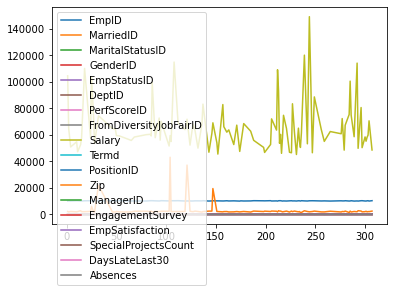

In [63]:
employee_data_without_nan.plot()

<AxesSubplot:>

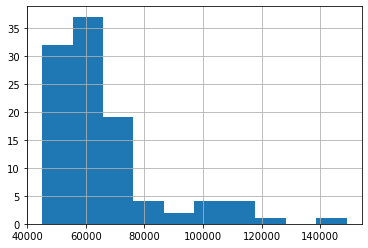

In [64]:
employee_data_without_nan['Salary'].hist()